# General Summary

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Total number of processed images
processed_csv_files = ['L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Results_Batch_1.csv' , 
             'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Results_Batch_2.csv',
             'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Results_Batch_3.csv']

total_processed_images = 0

for file in processed_csv_files:
    df = pd.read_csv(file) 
    total_processed_images += len(df)  

print("Total number of processed ISIS images:", total_processed_images)

Total number of processed ISIS images: 838437


In [3]:
Yield  = total_processed_images * 100/1371801 #Total number of  digitized ISIS 1 and 2 Images
print ("Overall Yield - Processed ISIS 1 and 2 images: ", Yield)

Overall Yield - Processed ISIS 1 and 2 images:  61.11943350383911


### Number of ISIS - 1 processed data

In [4]:
total_ISIS1_images = 0

for file in processed_csv_files:
    df = pd.read_csv(file)
    filtered_df = df[df['Subdirectory'].str.contains('ISIS-A|ISIS A', case=False)]
    total_ISIS1_images += len(filtered_df)

print("Total number of processed ISIS 1 images:", total_ISIS1_images)

Total number of processed ISIS 1 images: 407250


### Number of ISIS - 2 processed data

In [5]:
total_ISIS2_images = 0

for file in processed_csv_files:
    df = pd.read_csv(file)
    filtered_df = df[df['Subdirectory'].str.contains('ISIS-B|ISIS B', case=False)]
    total_ISIS2_images += len(filtered_df)

print("Total number of processed ISIS 2 images:", total_ISIS2_images)

Total number of processed ISIS 2 images: 431167


### Total number of unprocessed images

In [6]:
loss_csv_files = ['L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Loss_Batch_1.csv' , 
             'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Loss_Batch_2.csv ',
             'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/Merged_Loss_Batch_3.csv']

unique_image_paths = set()

for file in loss_csv_files :
    df = pd.read_csv(file)  
    image_paths = df.apply(lambda row: f"{row['Directory']}/{row['Subdirectory']}/{row['Filename']}", axis=1)
    unique_image_paths.update(image_paths)

total_loss_images = len(unique_image_paths)

print("Total loss images (unique):", total_loss_images)

Total loss images (unique): 533364


### Further Analysis of unprocessed images  

Testing if there are any matches between the loss .csv and the ones previously flagged for rescanning

In [18]:
cropped_too_soon_flagged = ['L:/DATA/ISIS/cropped_too_soon_detection_batch1/cropped_too_soon_results.csv',
                            'L:/DATA/ISIS/cropped_too_soon_detection_batch2/cropped_too_soon_results.csv',
                            'L:/DATA/ISIS/cropped_too_soon_detection_batch2_addition/cropped_too_soon_results.csv',
                            'L:/DATA/ISIS/cropped_too_soon_detection_batch3/cropped_too_soon_results.csv']
cropped_paths_set = set()
for file in cropped_too_soon_flagged:
    df_cropped = pd.read_csv(file)
    cropped_image_paths = df_cropped.apply(lambda row: f"{row['Directory']}/{row['Subdirectory']}/{row['Filename']}", axis=1)
    cropped_paths_set.update(cropped_image_paths)

total_matches = 0
unmatched_image_paths = []

for file in loss_csv_files:
    df_loss = pd.read_csv(file)
    loss_image_paths = df_loss.apply(lambda row: f"{row['Directory']}/{row['Subdirectory']}/{row['Filename']}", axis=1)
    matched_paths = set(loss_image_paths) & cropped_paths_set
    total_matches += len(matched_paths)
    unmatched_image_paths.extend(list(set(loss_image_paths) - matched_paths))

print("Total values from loss_csv files that match with cropped_too_soon_flagged paths:", total_matches)


Total values from loss_csv files that match with cropped_too_soon_flagged paths: 531305


In [19]:
true_loss = total_loss_images - total_matches
print ("True loss: " , true_loss)

True loss:  2059


In [20]:
unmatched_df = pd.DataFrame({"Image_Path": unmatched_image_paths})
unmatched_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/unmatched_loss_images.csv', index=False)

print("Unmatched values have been saved to unmatched_loss_images.csv")


Unmatched values have been saved to unmatched_loss_images.csv


 ### Examples of true loss
 All of the 2059 images are within the R014207775 directory.

L:\DATA\ISIS\ISIS_102000056114\R014207775\B1-35-23 ISIS B D-618\image14312.png

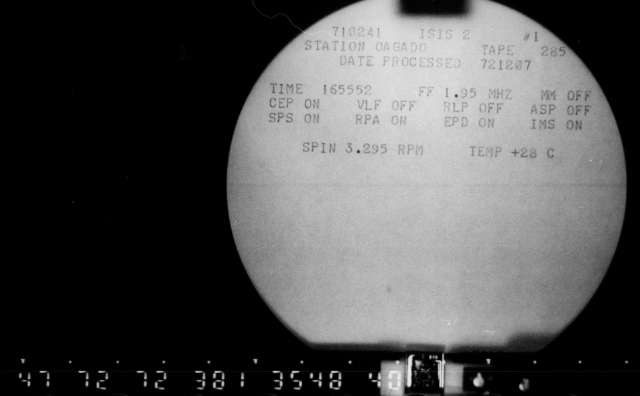

L:\DATA\ISIS\ISIS_102000056114\R014207775\B1-35-23 ISIS B D-609\image10237.png

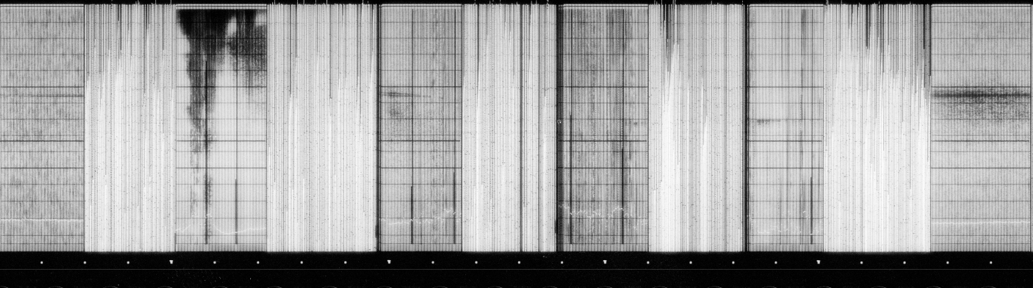

### Further analysis of processed images 

In [23]:
#Merging the CSV files
dfs = [pd.read_csv(file) for file in processed_csv_files]
merged_df = pd.concat(dfs , ignore_index=True)
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv', index=False)

In [4]:
merged_df = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv')
print(merged_df[['Year', 'Day', 'Hour', 'Minute', 'Second']].head(10))

   Year  Day  Hour  Minute  Second
0  1971   61    16      50      30
1  1971   61    16      50      59
2  1971   61    16      51      28
3  1971   61    16      51      57
4  1971   61    16      52      26
5  1971   61    16      52      55
6  1971   61    16      53      23
7  1971   61    16      53      52
8  1971   61    16      54      21
9  1971   61    16      54      50


#### Year: ISIS - 1 satellite was launched in 1969 so now value should be lower than 1969 for year. 

In [25]:
#Testing the year coloumn to see if the range make sense. 
year_range = (merged_df['Year'].min(), merged_df['Year'].max())

count_lower_than_1969 = (merged_df['Year'] < 69).sum()

print("Range of the 'Year' column:", year_range)
print("Number of values in the 'Year' column lower than 1969 (incorrectly identified):", count_lower_than_1969)

Range of the 'Year' column: (0, 99)
Number of values in the 'Year' column lower than 1969 (incorrectly identified): 83974


In [26]:
filtered_df = merged_df[merged_df['Year'] < 69.0]

# Print the top 15 rows
print("Top 15 rows with 'Year' values less than 1969:")
print(filtered_df.head(15))

Top 15 rows with 'Year' values less than 1969:
    Unnamed: 0  Satellite_Code  Fixed_Frequency_Code  Station_Number  \
7            7               3                     4              70   
20          20               3                     6              10   
23          23               3                     6              70   
29          29               3                     6              70   
31          31               3                     1              70   
33          33               3                     1              70   
34          34               3                     1              10   
35          35               3                     1              70   
36          36               3                     1              70   
38          38               3                     1              71   
39          39               3                     1              70   
40          40               3                     1              70   
45          45   

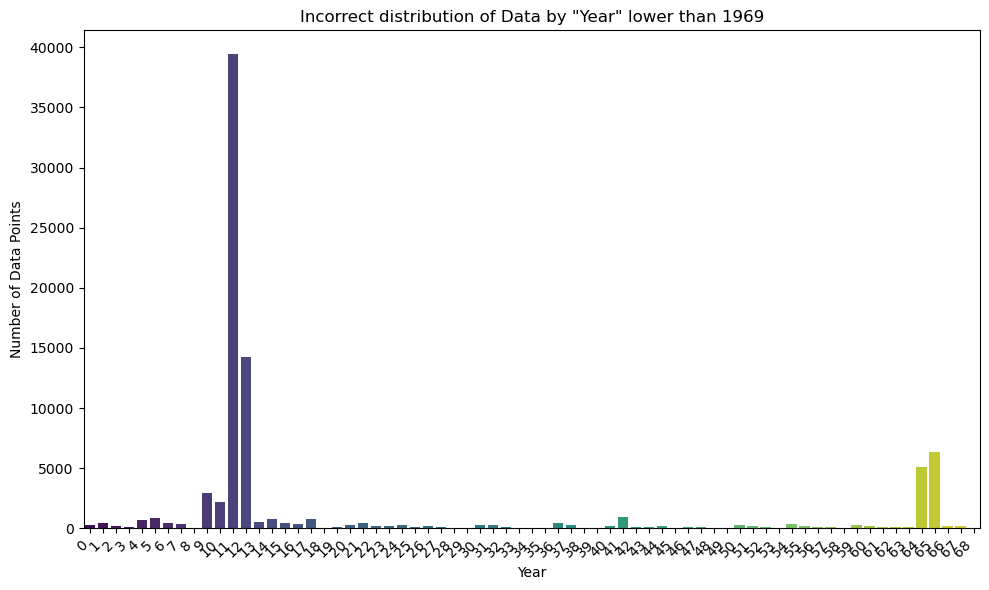

In [17]:
filtered_year_counts = year_counts[year_counts.index <69]

plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_year_counts.index, y=filtered_year_counts.values, palette="viridis")
plt.title('Incorrect distribution of Data by "Year" lower than 1969')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [27]:
# Replacing values in the 'Year' column where the first digit is '1' with '7' after manual check
merged_df['Year'] = merged_df['Year'].astype(str).str.replace('^1', '7', regex=True).astype(float)
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv', index=False)

In [33]:
merged_df = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv')
# Calculating the year range and count values lower than 1969 again
new_year_range = (merged_df['Year'].min(), merged_df['Year'].max())
count_lower_than_1969 = (merged_df['Year'] < 69).sum()
# Print the range of the 'Year' column and count of values lower than 1969
print("Range of the 'Year' column:", new_year_range)
print("Number of values in the 'Year' column lower than 1969 (incorrectly identified):", count_lower_than_1969)

Range of the 'Year' column: (0.0, 99.0)
Number of values in the 'Year' column lower than 1969 (incorrectly identified): 25220


C:\Users\rsheikholmolouki\AppData\Local\Temp\ipykernel_19528\230515335.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv')


In [36]:
year_counts = merged_df['Year'].value_counts()
max_year = year_counts.idxmax()
max_count = year_counts.max()
print(f"The year with the most data points is {max_year} with {max_count} data points.")

The year with the most data points is 72.0 with 358963 data points.


In [37]:
min_year = year_counts.idxmin()
min_count = year_counts.min()
print(f"The year with the least data points is {min_year} with {min_count} data points.")

The year with the least data points is 84.0 with 2 data points.


In [67]:
# Add a new column 'Outliers' with the specified message for rows where 'Year' < 1969
merged_df.insert(0, 'Outlier', '')
merged_df.loc[merged_df['Year'] < 69, 'Outlier'] = 'OCR read "Year" metadata below 1969'
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv', index=False)

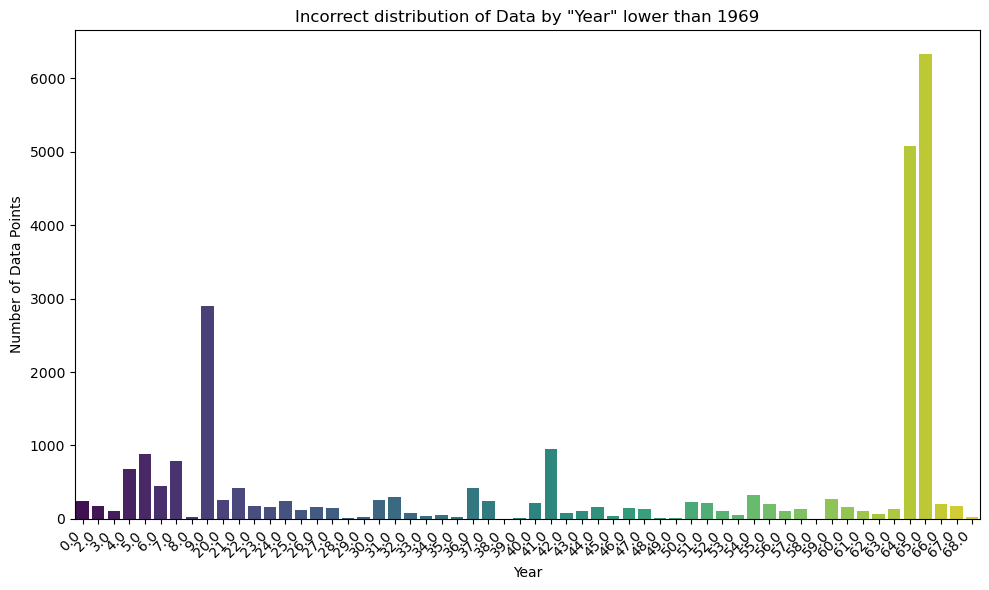

In [56]:
# Filter the DataFrame to include only rows where 'Year' < 69
filtered_df = merged_df[merged_df['Year'] < 69.0]
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_df['Year'].value_counts().index, y=filtered_df['Year'].value_counts().values, palette="viridis")
plt.title('Incorrect distribution of Data by "Year" lower than 1969')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [82]:
# Add 1900 to each value in the "Year" column
merged_df['Year'] = merged_df['Year'] + 1900
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv', index=False)

In [5]:
details_counts = merged_df['Outlier'].value_counts()
print("Table of Cases of outlier:", details_counts)

Table of Cases of outlier: OCR read "Year" metadata below 1969    25220
Name: Outlier, dtype: int64


### Day - No value should be higher than 365. Cases with incorrect year were removed from this analysis

In [22]:
# Convert 'Day' column to numeric values
merged_df['Day'] = pd.to_numeric(merged_df['Day'], errors='coerce')
blankday_outliers =merged_df[merged_df['Outlier'].isnull()]
day_above_365 = blankday_outliers[blankday_outliers['Day'] > 365]

# Write "OCR read 'Day' above 365" under 'Outlier' column for selected instances
merged_df.loc[day_above_365.index, 'Outlier'] = "OCR read 'Day' above 365"

# Filter rows where 'Outlier' column is "OCR read 'Day' above 365"
outlier_above_365 =merged_df[merged_df['Outlier'] == "OCR read 'Day' above 365"]

print("\nRows where Outlier is OCR read 'Day' above 365:")
print(outlier_above_365.head())


Rows where Outlier is OCR read 'Day' above 365:
                       Outlier  Satellite_Code  Fixed_Frequency_Code  \
38    OCR read 'Day' above 365               3                     1   
2481  OCR read 'Day' above 365               3                     1   
2718  OCR read 'Day' above 365               3                     7   
3082  OCR read 'Day' above 365               3                     2   
3279  OCR read 'Day' above 365               3                     2   

      Station_Number Station_Location Station_ID  Station_Lat  Station_Lon  \
38                71                0          0          0.0          0.0   
2481              32                0          0          0.0          0.0   
2718              72  Unknown Station    UNKNOWN          1.0          1.0   
3082              69  Unknown Station    UNKNOWN          1.0          1.0   
3279              69  Unknown Station    UNKNOWN          1.0          1.0   

      Year  Day  Hour  Minute  Second       Filen

In [23]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv', index=False)

In [24]:
num_instances = len(outlier_above_365)
print("\nNumber of instances where Outlier is OCR read 'Day' above 365:", num_instances)


Number of instances where Outlier is OCR read 'Day' above 365: 10010


In [26]:
# Convert 'Day' column to string and adding leading zeros. Needed for creating a timestamp
#Currently we have one digit and two digit values. Ex: 1 instead of 001, 22 instead of 022. 
merged_df['Day'] = merged_df['Day'].apply(lambda x: str(x).zfill(3))
print(merged_df.head()) 

  Outlier  Satellite_Code  Fixed_Frequency_Code  Station_Number  \
0     NaN               3                     4              70   
1     NaN               3                     4              70   
2     NaN               3                     4              70   
3     NaN               3                     4              70   
4     NaN               3                     4              70   

  Station_Location Station_ID  Station_Lat  Station_Lon  Year  Day  Hour  \
0  Kashima, Japan         KER         35.0        140.0  1971  061    16   
1  Kashima, Japan         KER         35.0        140.0  1971  061    16   
2  Kashima, Japan         KER         35.0        140.0  1971  061    16   
3  Kashima, Japan         KER         35.0        140.0  1971  061    16   
4  Kashima, Japan         KER         35.0        140.0  1971  061    16   

   Minute  Second       Filename       Directory           Subdirectory  
0      50      30  Image0002.png  b10_R014207713  B1-34-61 ISIS A 

In [27]:
# Save the modified DataFrame back to the original CSV file
with open("L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv", "w", newline='', encoding='utf-8') as f:
    merged_df.to_csv(f, index=False)

### Hour - No value should be higher than 60. Cases with incorrect day were removed from this analysis

In [31]:
blankhour_outliers = merged_df[merged_df['Outlier'].isnull()]
hour_above_60 = blankhour_outliers[blankhour_outliers['Hour'] > 60]
merged_df.loc[hour_above_60.index, 'Outlier'] = "OCR read 'Hour' above 60"
outlierhour_above_60 = merged_df[merged_df['Outlier'] == "OCR read 'Hour' above 60"]
print(outlierhour_above_60.head())
num_instances = len(outlierhour_above_60)
print("\nNumber of instances where Outlier is OCR read 'Hour' above 60:", num_instances)

                       Outlier  Satellite_Code  Fixed_Frequency_Code  \
2478  OCR read 'Hour' above 60               3                     7   
3311  OCR read 'Hour' above 60               3                     4   
4276  OCR read 'Hour' above 60               3                     1   
5009  OCR read 'Hour' above 60               3                     1   
7966  OCR read 'Hour' above 60               3                     1   

      Station_Number Station_Location Station_ID  Station_Lat  Station_Lon  \
2478              72  Unknown Station    UNKNOWN          1.0          1.0   
3311              69  Unknown Station    UNKNOWN          1.0          1.0   
4276              10                0          0          0.0          0.0   
5009              10                0          0          0.0          0.0   
7966              10                0          0          0.0          0.0   

      Year  Day  Hour  Minute  Second       Filename       Directory  \
2478  1970  061    77     

In [32]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv', index=False)

In [33]:
# Convert 'Hour' column to string and adding leading zeros. Needed for creating a timestamp
merged_df['Hour'] = merged_df['Hour'].apply(lambda x: str(x).zfill(2)) 

  Outlier  Satellite_Code  Fixed_Frequency_Code  Station_Number  \
0     NaN               3                     4              70   
1     NaN               3                     4              70   
2     NaN               3                     4              70   
3     NaN               3                     4              70   
4     NaN               3                     4              70   

  Station_Location Station_ID  Station_Lat  Station_Lon  Year  Day Hour  \
0  Kashima, Japan         KER         35.0        140.0  1971  061   16   
1  Kashima, Japan         KER         35.0        140.0  1971  061   16   
2  Kashima, Japan         KER         35.0        140.0  1971  061   16   
3  Kashima, Japan         KER         35.0        140.0  1971  061   16   
4  Kashima, Japan         KER         35.0        140.0  1971  061   16   

   Minute  Second       Filename       Directory           Subdirectory  
0      50      30  Image0002.png  b10_R014207713  B1-34-61 ISIS A C-918 

In [34]:
with open("L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv", "w", newline='', encoding='utf-8') as f:
    merged_df.to_csv(f, index=False)

### Minute - No value should be higher than 60. Cases with incorrect hour were removed from this analysis

In [36]:
blankmin_outliers = merged_df[merged_df['Outlier'].isnull()]
min_above_60 = blankmin_outliers[blankmin_outliers['Minute'] > 60]
merged_df.loc[min_above_60.index, 'Outlier'] = "OCR read 'Minute' above 60"
outliermin_above_60 = merged_df[merged_df['Outlier'] == "OCR read 'Minute' above 60"]
print(outliermin_above_60.head())
num_instances = len(outliermin_above_60)
print("\nNumber of instances where Outlier is OCR read 'Minute' above 60:", num_instances)

                         Outlier  Satellite_Code  Fixed_Frequency_Code  \
262   OCR read 'Minute' above 60               3                     1   
1311  OCR read 'Minute' above 60               7                     7   
1718  OCR read 'Minute' above 60               3                     7   
1824  OCR read 'Minute' above 60               3                     7   
2517  OCR read 'Minute' above 60               3                     7   

      Station_Number Station_Location Station_ID  Station_Lat  Station_Lon  \
262               70  Kashima, Japan         KER         35.0        140.0   
1311              69  Unknown Station    UNKNOWN          1.0          1.0   
1718              69  Unknown Station    UNKNOWN          1.0          1.0   
1824              69  Unknown Station    UNKNOWN          1.0          1.0   
2517              72  Unknown Station    UNKNOWN          1.0          1.0   

      Year  Day Hour  Minute  Second       Filename       Directory  \
262   1971  114

In [37]:
with open("L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv", "w", newline='', encoding='utf-8') as f:
    merged_df.to_csv(f, index=False)

### Second - No value should be higher than 60 - Cases with incorrect Minute were removed from this analysis

In [38]:
blanksec_outliers = merged_df[merged_df['Outlier'].isnull()]
sec_above_60 = blanksec_outliers [blanksec_outliers ['Second'] > 60]
merged_df.loc[sec_above_60.index, 'Outlier'] = "OCR read 'Second' above 60"
outliersec_above_60 = merged_df[merged_df['Outlier'] == "OCR read 'Second' above 60"]
print(outliersec_above_60.head())
num_instances = len(outliersec_above_60)
print("\nNumber of instances where Outlier is OCR read 'Second' above 60:", num_instances)

                         Outlier  Satellite_Code  Fixed_Frequency_Code  \
426   OCR read 'Second' above 60               3                     1   
476   OCR read 'Second' above 60               3                     5   
2848  OCR read 'Second' above 60               3                     1   
2875  OCR read 'Second' above 60               3                     7   
2891  OCR read 'Second' above 60               3                     7   

      Station_Number Station_Location Station_ID  Station_Lat  Station_Lon  \
426               11                0          0          0.0          0.0   
476               69  Unknown Station    UNKNOWN          1.0          1.0   
2848              69  Unknown Station    UNKNOWN          1.0          1.0   
2875              69  Unknown Station    UNKNOWN          1.0          1.0   
2891              69  Unknown Station    UNKNOWN          1.0          1.0   

      Year  Day Hour  Minute  Second       Filename       Directory  \
426   1971  126

In [39]:
with open("L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv", "w", newline='', encoding='utf-8') as f:
    merged_df.to_csv(f, index=False)

### Outlier table

In [46]:
# Creating a table of the Outlier columns including blank values
outliers = merged_df['Outlier'].unique()

outlier_counts = merged_df['Outlier'].value_counts(dropna=False).reset_index()
outlier_counts.columns = ['Outlier', 'Count']

print(outlier_counts)

                               Outlier   Count
0                                  NaN  790535
1  OCR read "Year" metadata below 1969   25220
2             OCR read 'Day' above 365   10010
3           OCR read 'Second' above 60    4618
4             OCR read 'Hour' above 60    4103
5           OCR read 'Minute' above 60    3951


### Time quality: This column would show our level of certainty of the time
5 - Least certain, 1 - Most certain

In [65]:
# Defining a function to assign time quality based on outlier values
def assign_time_quality(row):
    outlier = str(row['Outlier'])  # Convert NaN to string for compatibility
    if 'OCR read "Year" metadata below 1969' in outlier:
        return 5
    elif "OCR read 'Day' above 365" in outlier:
        return 4
    elif "OCR read 'Hour' above 60" in outlier:
        return 3
    elif "OCR read 'Minute' above 60" in outlier:
        return 2
    elif "OCR read 'Second' above 60" in outlier:
        return 1
    else:
        return 1

In [66]:
merged_df['Time_quality'] = merged_df.apply(assign_time_quality, axis=1)

In [67]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv', index=False)

### Constructing Timestamp

In [110]:
# Converting 'Hour' column to integer to create a timestamp
merged_df['Hour'] = merged_df['Hour'].astype(int)

# Iterate over the rows and construct the timestamp
for index, row in merged_df.iterrows():
    if row['Time_quality'] == 1:
        year = row['Year']
        month = int(row['Day'] / 30.42) + 1  # Approximate months from day of year
        day = int(row['Day'] % 30)  # Approximate day in the month
        hour = row['Hour']
        minute = row['Minute']
        second = row['Second']
        
        # Create timestamp in YYYY.MM.DD HH:MM:SS format
        timestamp = f"{year:04d}.{month:02d}.{day:02d} {hour:02d}:{minute:02d}:{second:02d}"
        
        merged_df.at[index, 'Timestamp'] = timestamp
        
    elif row['Time_quality'] == 2:
        year = row['Year']
        month = int(row['Day'] / 30.42) + 1 
        day = int(row['Day'] % 30)  
        hour = row['Hour']
        
        # Create timestamp in YYYY.MM.DD HH:00:00 format
        timestamp = f"{year:04d}.{month:02d}.{day:02d} {hour:02d}:00:00"
        
        merged_df.at[index, 'Timestamp'] = timestamp
        
    elif row['Time_quality'] == 3:
        year = row['Year']
        month = int(row['Day'] / 30.42) + 1  
        day = int(row['Day'] % 30)  
        
        # Create timestamp in YYYY.MM.DD 00:00:00 format
        timestamp = f"{year:04d}.{month:02d}.{day:02d} 00:00:00"
        

        merged_df.at[index, 'Timestamp'] = timestamp
        
    elif row['Time_quality'] == 4:
        year = row['Year']

        timestamp = f"{year:04d}.00.00 00:00:00"
        
        merged_df.at[index, 'Timestamp'] = timestamp
    else:
        timestamp = "Low certainty"
        
       
        merged_df.at[index, 'Timestamp'] = timestamp
    

In [111]:
print(merged_df)

       Outlier  Satellite_Code  Fixed_Frequency_Code  Station_Number  \
0          NaN               3                     4              70   
1          NaN               3                     4              70   
2          NaN               3                     4              70   
3          NaN               3                     4              70   
4          NaN               3                     4              70   
...        ...             ...                   ...             ...   
838432     NaN               4                     6               0   
838433     NaN               4                     6               0   
838434     NaN               4                     1               0   
838435     NaN               4                     6               0   
838436     NaN               4                     1               0   

       Station_Location Station_ID  Station_Lat  Station_Lon  Year  Day  Hour  \
0       Kashima, Japan         KER         35.0       

In [112]:
merged_df.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv', index=False)

### Seperating the data from ISIS - 1 and ISIS -2 

In [13]:
def filter_and_save_csv(input_file, output_file_isis, output_file_other):
    df = pd.read_csv(input_file)
    
    # Filter the DataFrame based on the Subdirectory column containing "ISIS A" or "ISIS - A"
    isis_df = df[df['Subdirectory'].str.contains('ISIS A|ISIS - A', case=False, na=False)]
    
    # Filter the DataFrame based on the Subdirectory column NOT containing "ISIS A" or "ISIS - A"
    other_df = df[~df['Subdirectory'].str.contains('ISIS A|ISIS - A', case=False, na=False)]
    
    isis_df.to_csv(output_file_isis, index=False)
    print("Filtered 1 data saved to", output_file_isis)
    
    other_df.to_csv(output_file_other, index=False)
    print("Filtered 2 data saved to", output_file_other)

In [15]:
input_file = 'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/results_master_medata.csv'
output_file_isis = 'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_metadata.csv'
output_file_other = 'L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_metadata.csv'
filter_and_save_csv(input_file, output_file_isis, output_file_other)

Filtered 1 data saved to L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-1_metadata.csv
Filtered 2 data saved to L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/MERGED/ISIS-2_metadata.csv
